In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, BatchNormalization
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle



In [ ]:
pathToData = "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Binary Split/"
print(pathToData + "train_X.p")

drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Binary Split/train_X.p


In [ ]:
# load the train dataset
X_train = pickle.load(open(pathToData+"train_X.p", 'rb'))
y_train = pickle.load(open(pathToData+"train_Y.p", 'rb'))
#y_train = y_train.reshape(y_train.shape[0],-1)

print(X_train.shape)
print(y_train.shape)


# load the dev dataset
X_dev = pickle.load(open(pathToData+"dev_X.p", 'rb'))
y_dev = pickle.load(open(pathToData+"dev_Y.p", 'rb'))
#y_dev = y_dev.reshape(y_dev.shape[0],-1)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_test = pickle.load(open(pathToData+"test_X.p", 'rb'))
y_test = pickle.load(open(pathToData+"test_Y.p", 'rb'))
#y_test= y_test.reshape(y_test.shape[0],-1)

print(X_test.shape)
print(y_test.shape)

print(X_train.shape[1:])


(4246, 208, 160, 3)
(4246,)
(910, 208, 160, 3)
(910,)
(910, 208, 160, 3)
(910,)
(208, 160, 3)


In [ ]:
numExamples = X_train.shape[0]
print(numExamples)

4246


In [ ]:
print(y_test)

In [ ]:
#HYPERPARAMETER SEARCH OVER EPOCH NUMBER and BATCH SIZE
#We keep number of layers, neuron per layer, activation in each layer constant
batchSizes = [5,10,50,100,200]

print(batchSizes)
numEpochs = 30

[5, 10, 50, 100, 200]


In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

for batchSize in batchSizes:
  print("BatchSize : ", batchSize)
  model = Sequential()

  model.add(Conv2D(32, kernel_size=5, padding="same", input_shape= X_train.shape[1:], activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Conv2D(64, kernel_size=5, padding="same", activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Conv2D(64, kernel_size=5, padding="same", activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Conv2D(128, kernel_size=5, padding="same", activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Conv2D(256, kernel_size=5, padding="same", activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Flatten())

  model.add(Dense(5120, activation="relu"))
  model.add(Dense(1, activation='sigmoid'))

  
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=numEpochs, batch_size=batchSize, validation_data = (X_dev, y_dev))
  historyDict = history.history
  trainAccuracy.append(historyDict["accuracy"])
  valAccuracy.append(historyDict["val_accuracy"])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])

BatchSize :  5
Epoch 1/30
850/850 [==============================] - 74s 51ms/step - loss: 1.3113 - accuracy: 0.6345 - val_loss: 0.6382 - val_accuracy: 0.6835
Epoch 2/30
850/850 [==============================] - 43s 51ms/step - loss: 0.6583 - accuracy: 0.6547 - val_loss: 0.5857 - val_accuracy: 0.6868
Epoch 3/30
850/850 [==============================] - 42s 50ms/step - loss: 0.5927 - accuracy: 0.6976 - val_loss: 0.6601 - val_accuracy: 0.6846
Epoch 4/30
850/850 [==============================] - 43s 50ms/step - loss: 0.5854 - accuracy: 0.7080 - val_loss: 0.5320 - val_accuracy: 0.7297
Epoch 5/30
850/850 [==============================] - 43s 50ms/step - loss: 0.5739 - accuracy: 0.7068 - val_loss: 0.5778 - val_accuracy: 0.6879
Epoch 6/30
850/850 [==============================] - 43s 51ms/step - loss: 0.5587 - accuracy: 0.7252 - val_loss: 0.4781 - val_accuracy: 0.7714
Epoch 7/30
850/850 [==============================] - 43s 50ms/step - loss: 0.4957 - accuracy: 0.7701 - val_loss: 0.8472 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


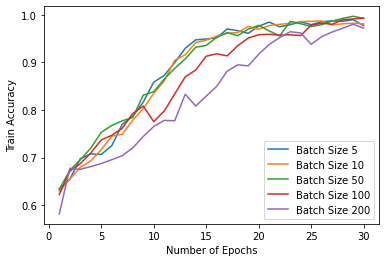

In [ ]:
#For Accuracy Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yTrainAcc = trainAccuracy
#Train Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainAcc[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Accuracy")
pyplot.show()


In [ ]:
#batchSizes = [5,10,50,100,200]
batchSizes = [5]#,10,50]
print(batchSizes)

[5]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


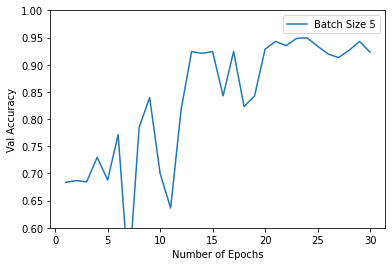

In [ ]:
#For Accuracy Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValAcc = valAccuracy
#Val Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValAcc[i],label=labelName)

pyplot.ylim([0.6,1])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Accuracy")
pyplot.show()

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yTrainLoss = trainLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Loss")
pyplot.show()

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Loss")
pyplot.show()

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  #pyplot.plot(x, yValLoss[i],label="Val")
  #pyplot.plot(x, yTrainLoss[i],label="Train")
  pyplot.plot(x, yValAcc[i],label="Val")
  pyplot.plot(x, yTrainAcc[i],label="Train")
#pyplot.xlim([2,7])
#pyplot.ylim([0,2])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
#pyplot.ylabel("Loss")
pyplot.ylabel("Accuracy")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


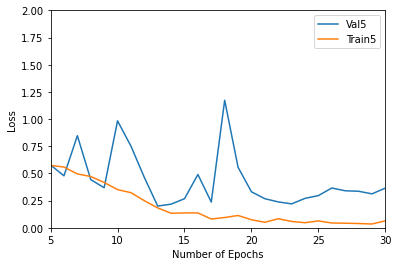

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label="Val"+str(currBatchSize))
  pyplot.plot(x, yTrainLoss[i],label="Train"+str(currBatchSize))

pyplot.xlim([5,30])
pyplot.ylim([0,2])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Loss")
pyplot.show()

In [ ]:
bestEpochs = 13
bestBatchSize = 5